### Whether the client has subscribed a term deposit or not

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bank-full.csv')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.shape

(45211, 17)

In [9]:
len(df)

45211

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [62]:
df.isnull().sum().sum()

0

In [63]:
df.duplicated().sum()

0

In [11]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column    value                
contact   telephone        2906
          unknown         13020
          cellular        29285
default   yes               815
          no              44396
education unknown          1857
          primary          6851
          tertiary        13301
          secondary       23202
housing   no              20081
          yes             25130
job       unknown           288
          student           938
          housemaid        1240
          unemployed       1303
          entrepreneur     1487
          self-employed    1579
          retired          2264
          services         4154
          admin.           5171
          technician       7597
          management       9458
          blue-collar      9732
loan      yes              7244
          no              37967
marital   divorced         5207
          single          12790
          married         27214
month     dec               214
          mar               477
          sep               579
          oct               738
          jan              1403
          feb              2649
          apr              2932
          nov              3970
          jun              5341
          aug              6247
          jul              6895
          may             13766
poutcome  success          1511
          other            1840
          failure          4901
          unknown         36959
y         yes              5289
          no              39922

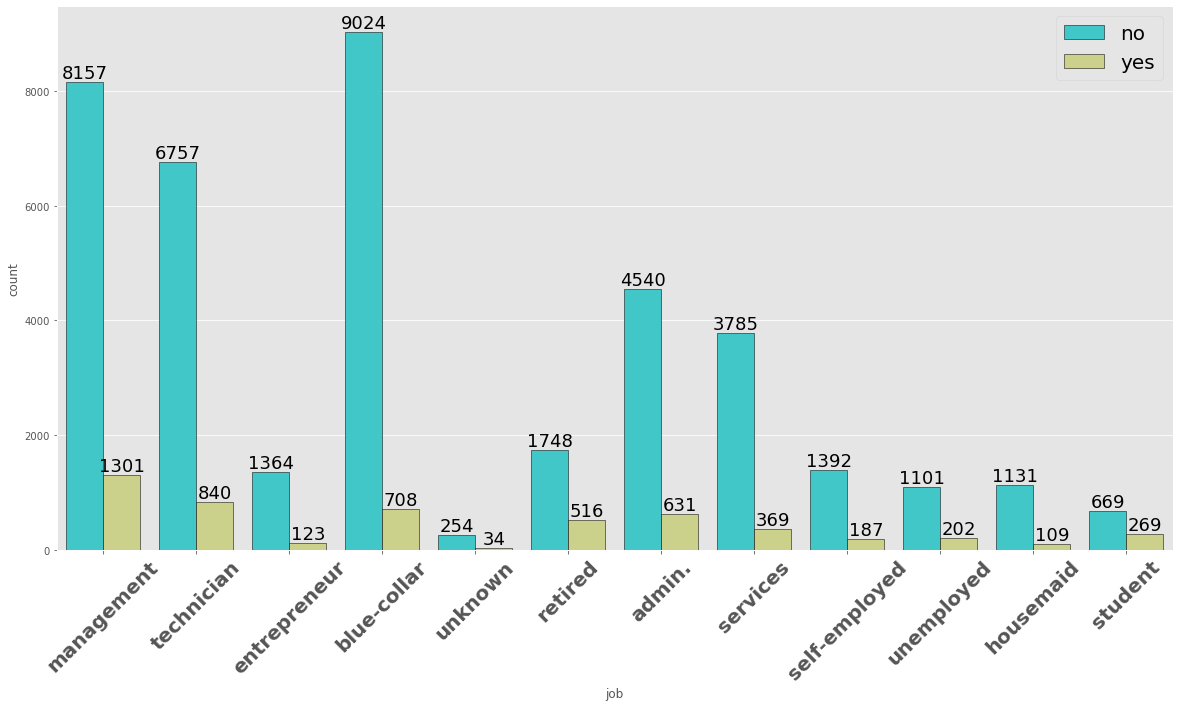

In [47]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='job', hue='y', palette='rainbow', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(rotation=45,fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

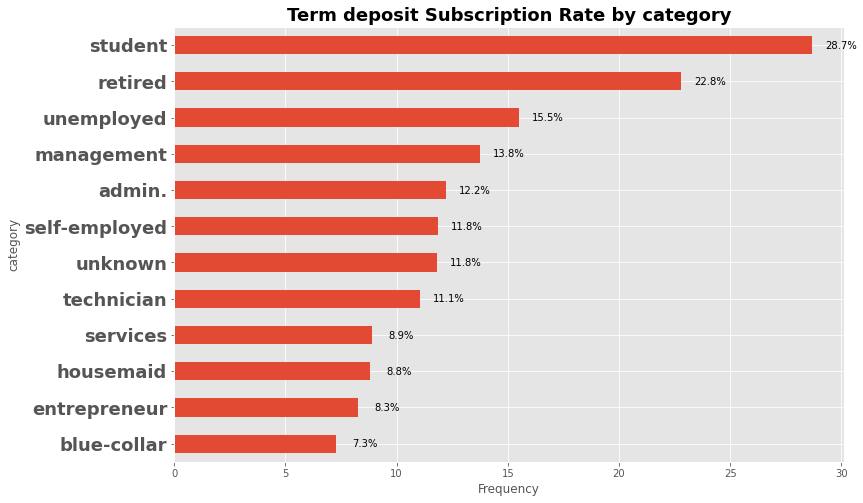

In [45]:
tab1 = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
tab1 = tab1.transpose()

plot_job = tab1['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,8))
                                                                           
plt.title('Term deposit Subscription Rate by category',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('category')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab1['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>So students followed by retired and then unemployed have the highest tern deposit subscription rate. 

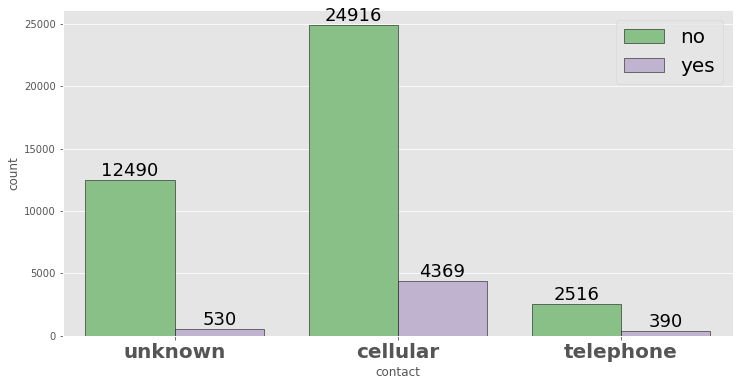

In [32]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='contact', hue='y', palette='Accent', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

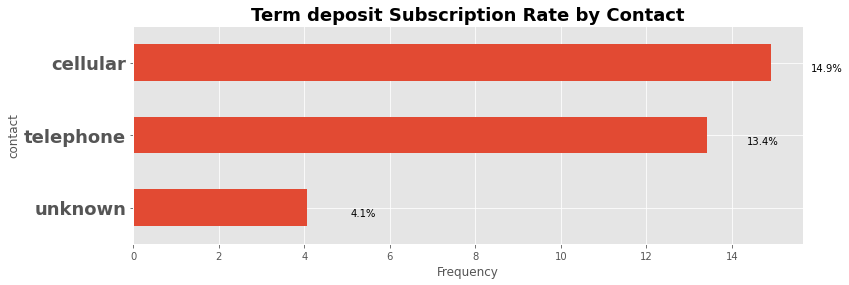

In [44]:
tab2 = pd.crosstab(df['y'],df['contact']).apply(lambda x: x/x.sum() * 100)
tab2 = tab2.transpose()

plot_job = tab2['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,4))
                                                                           
plt.title('Term deposit Subscription Rate by Contact',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('contact')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab2['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>So those who were contacted by mobile have highest subscription rate followed by telephone.

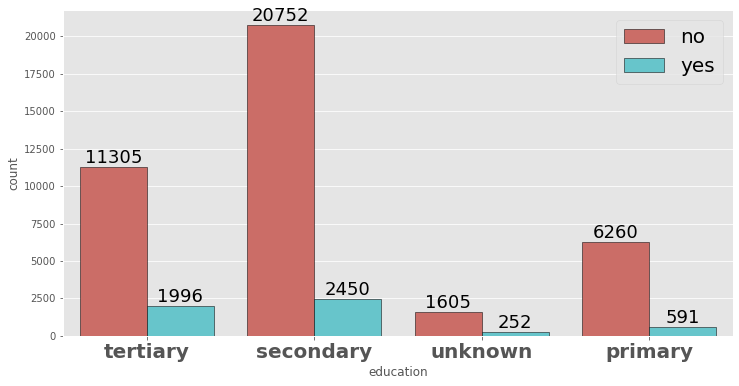

In [50]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='education', hue='y', palette='hls', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

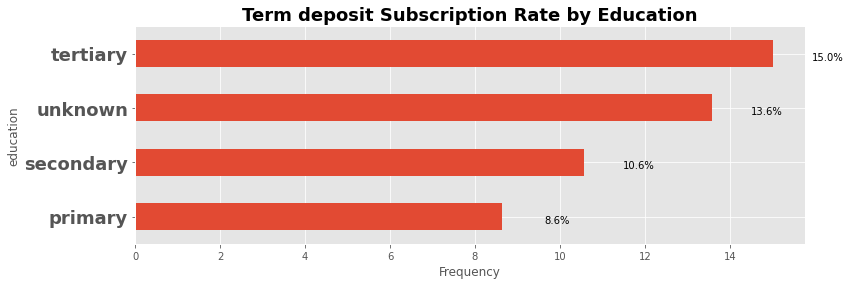

In [51]:
tab3 = pd.crosstab(df['y'],df['education']).apply(lambda x: x/x.sum() * 100)
tab3 = tab3.transpose()

plot_job = tab3['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,4))
                                                                           
plt.title('Term deposit Subscription Rate by Education',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('education')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab3['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>So those who have tertiary level of education have highest subscription rate followed by unknown category.

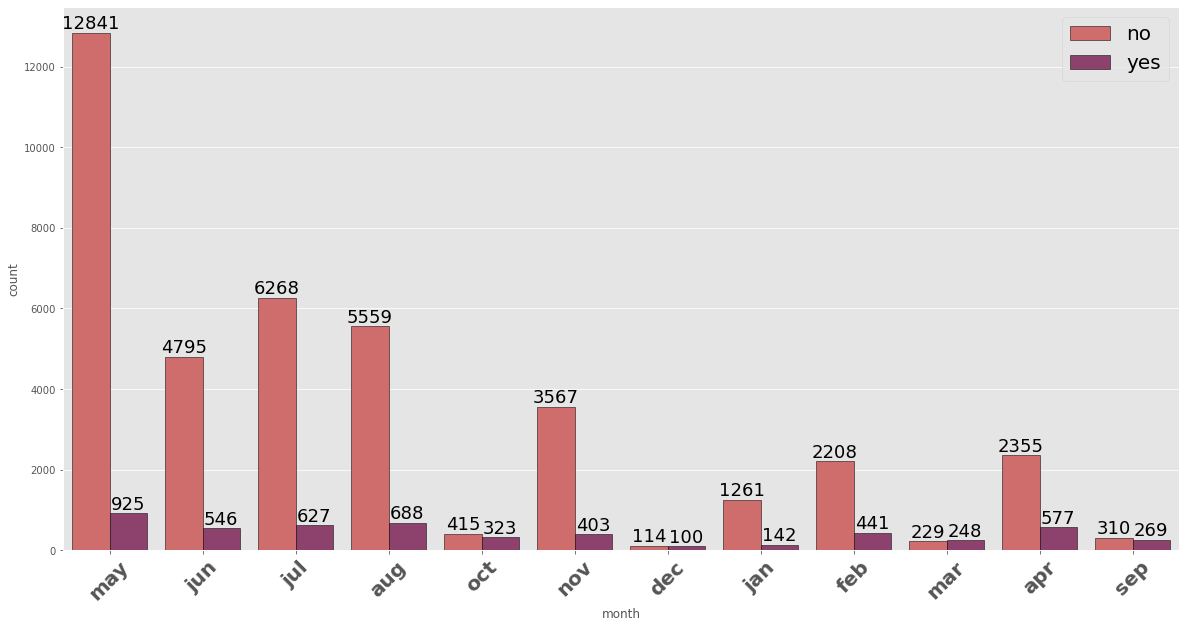

In [52]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='month', hue='y', palette='flare', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(rotation=45,fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

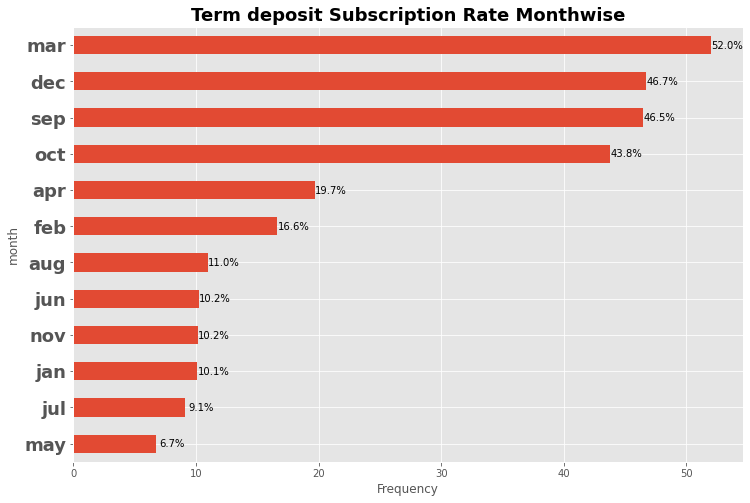

In [54]:
tab4 = pd.crosstab(df['y'],df['month']).apply(lambda x: x/x.sum() * 100)
tab4 = tab4.transpose()

plot_job = tab4['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,8))
                                                                           
plt.title('Term deposit Subscription Rate Monthwise',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('month')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab4['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>There is highest term deposit subscription rate in the month of March followed by December, September and October. Month of May has lowest subscription rate.

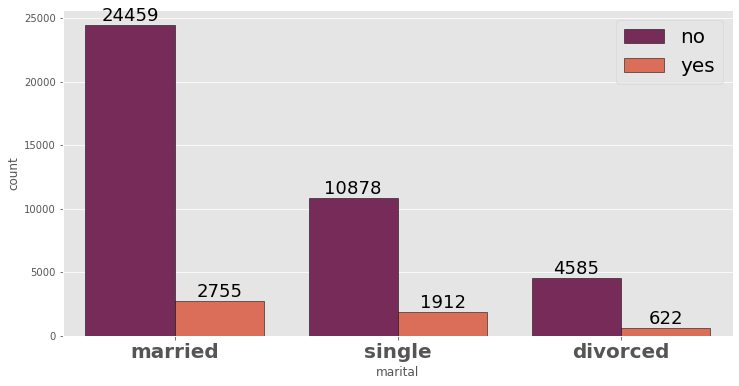

In [55]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='marital', hue='y', palette='rocket', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

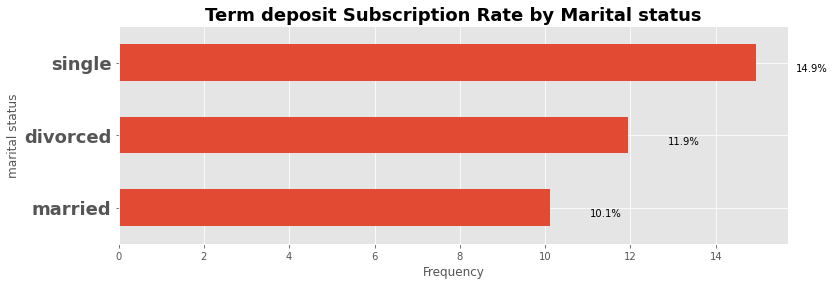

In [56]:
tab5 = pd.crosstab(df['y'],df['marital']).apply(lambda x: x/x.sum() * 100)
tab5 = tab5.transpose()

plot_job = tab5['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,4))
                                                                           
plt.title('Term deposit Subscription Rate by Marital status',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('marital status')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab5['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>Singles have the highest subscription rate.

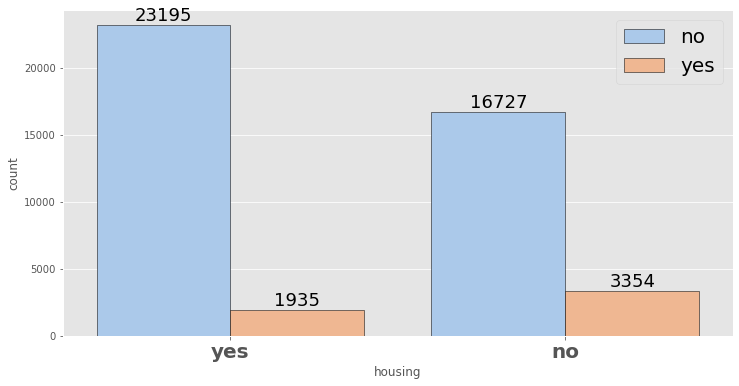

In [57]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='housing', hue='y', palette='pastel', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

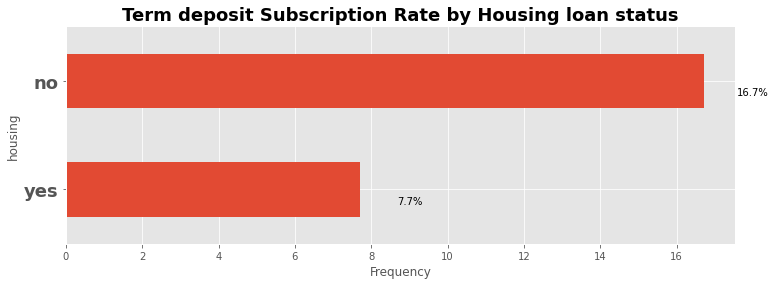

In [59]:
tab6 = pd.crosstab(df['y'],df['housing']).apply(lambda x: x/x.sum() * 100)
tab6 = tab6.transpose()

plot_job = tab6['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,4))
                                                                           
plt.title('Term deposit Subscription Rate by Housing loan status',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('housing')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab6['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>Those who did not take housing loan have higher term deposit subscription rate.

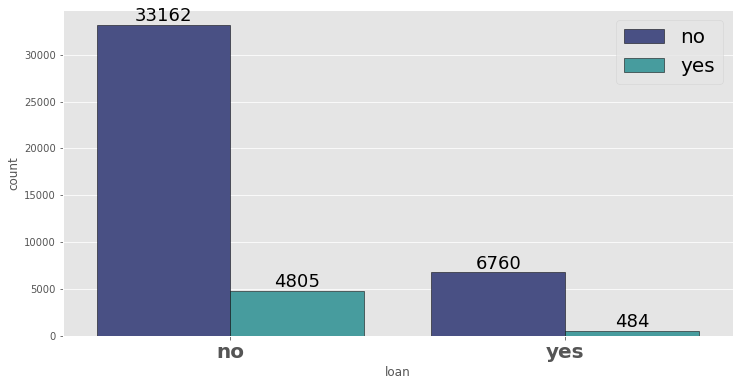

In [60]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='loan', hue='y', palette='mako', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

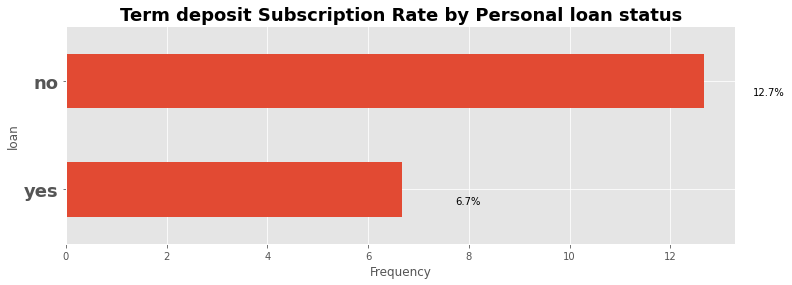

In [61]:
tab7 = pd.crosstab(df['y'],df['loan']).apply(lambda x: x/x.sum() * 100)
tab7 = tab7.transpose()

plot_job = tab7['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,4))
                                                                           
plt.title('Term deposit Subscription Rate by Personal loan status',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('loan')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab7['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>Those who did not take personal loan have higher term deposit subscription rate.

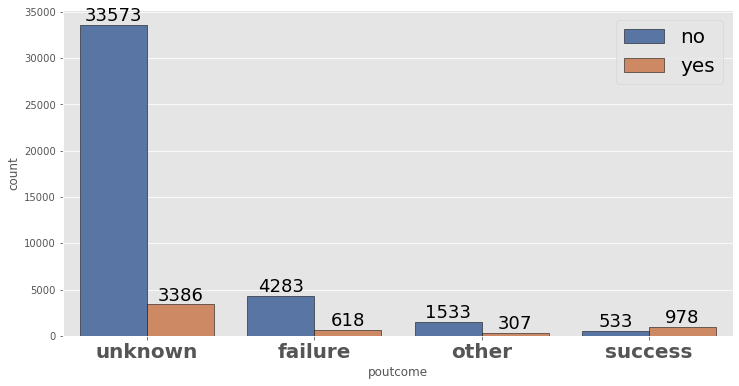

In [73]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='poutcome', hue='y', palette='deep', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

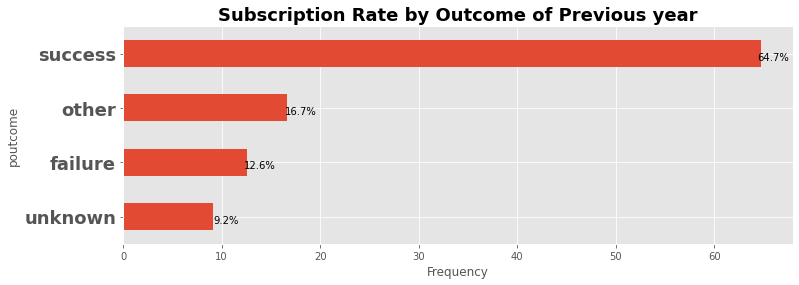

In [74]:
tab8 = pd.crosstab(df['y'],df['poutcome']).apply(lambda x: x/x.sum() * 100)
tab8 = tab8.transpose()

plot_job = tab8['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,4))
                                                                           
plt.title('Subscription Rate by Outcome of Previous year',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('poutcome')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab8['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>The Success rate of previous year has large positive effect on the current year too.

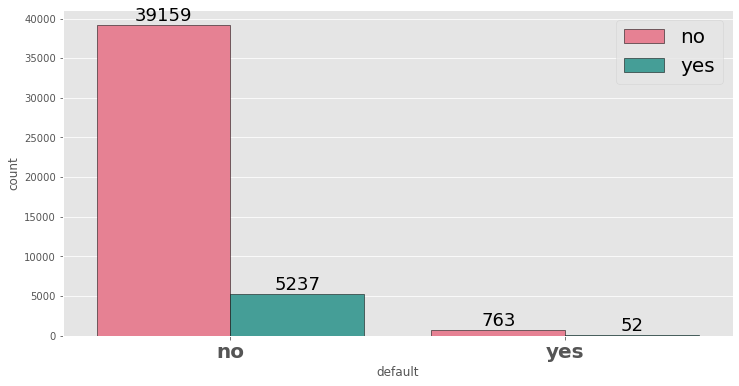

In [75]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='default', hue='y', palette='husl', edgecolor='black')
plt.legend(fontsize=20)
plt.xticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

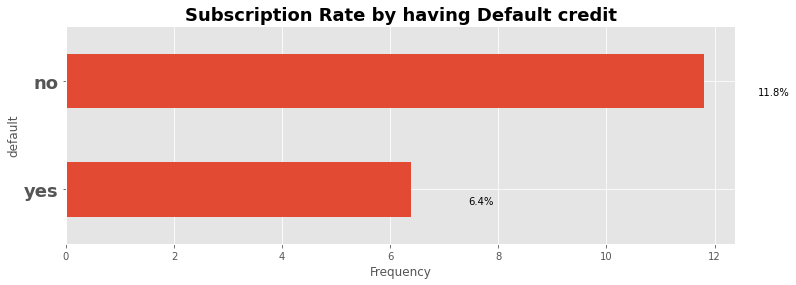

In [76]:
tab9 = pd.crosstab(df['y'],df['default']).apply(lambda x: x/x.sum() * 100)
tab9 = tab9.transpose()

plot_job = tab9['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,4))
                                                                           
plt.title('Subscription Rate by having Default credit',fontsize=18,fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('default')
plt.yticks(fontsize=18,fontweight='bold')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab9['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<font color='peach'><b>Those who do not have credit by default have higher subscription rate.

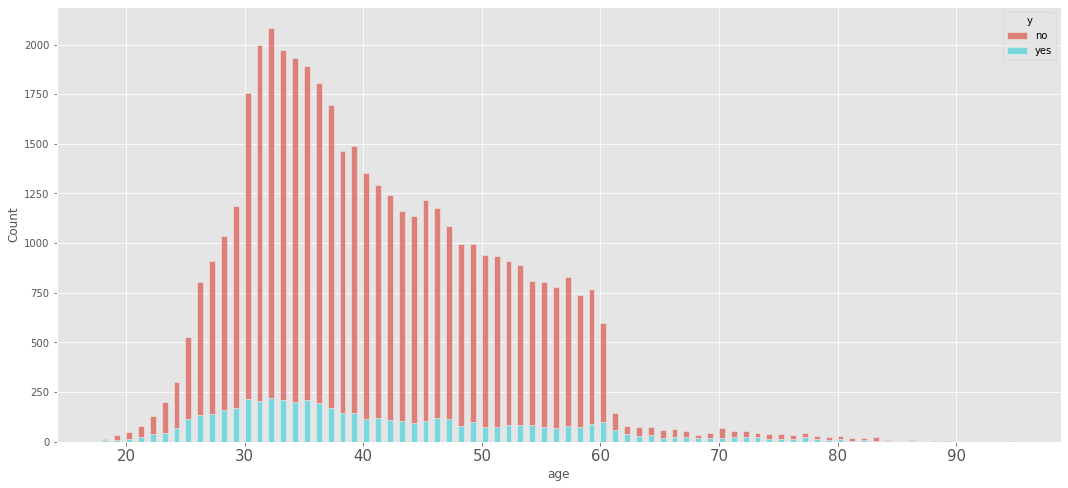

In [70]:
plt.figure(figsize=(18,8))
sns.histplot(binwidth=0.5, x="age", hue="y", data=df, stat="count", multiple="stack",palette='hls')
plt.xticks(fontsize=15);

<font color='peach'><b>The largest number of clients are in the age group of 30-40 followed by 40-50 and 50-60 age group. 

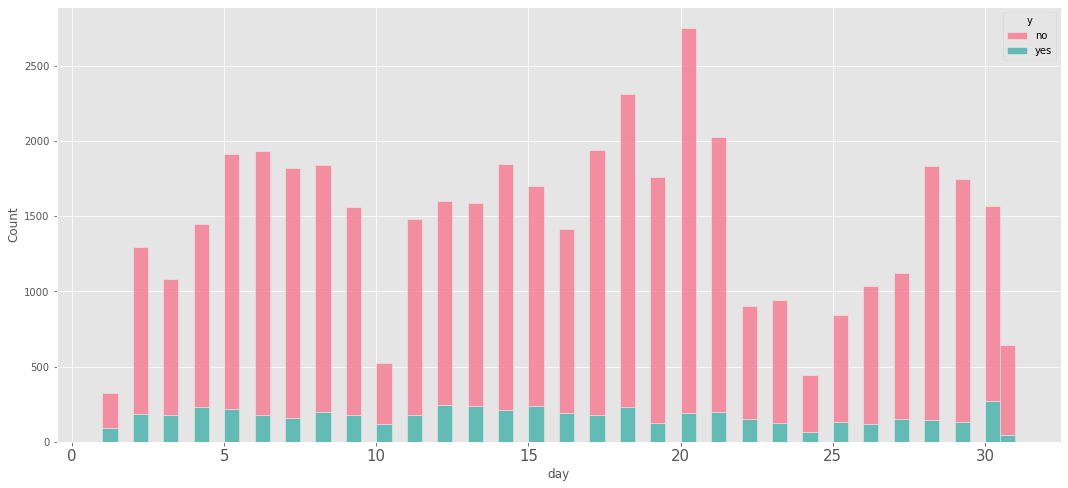

In [81]:
plt.figure(figsize=(18,8))
sns.histplot(binwidth=0.5, x="day", hue="y", data=df, stat="count", multiple="stack",palette='husl')
plt.xticks(fontsize=15);

<font color='peach'><b>Subscription is high when the last day contact of the month is 20.

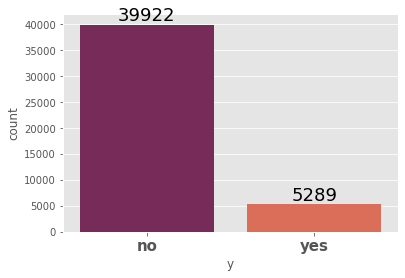

In [86]:
ax=sns.countplot(x='y',data=df,palette='rocket')
plt.xticks(fontsize=15,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

<font color='peach'><b>There is class imbalance in the target variable. 

## <font color='magenta'>Check for Multicollinearity :

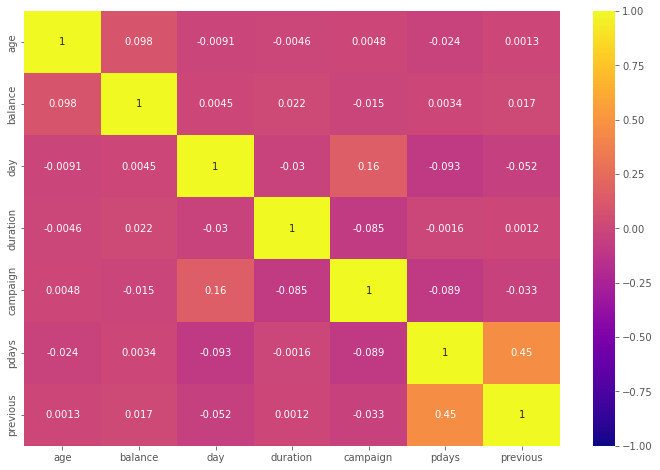

In [87]:
correlation = df.select_dtypes(include='int64').corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,cmap='plasma',
           annot=True);

<font color='peach'><b>There is no multicollinearity between numeric variables.

## <font color='magenta'><b>Encode the Categorical variables :

### <font color='maroon'><b><I>Encoding based on the Subscription rate :

In [88]:
df_enc = df.copy()

In [89]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [90]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [91]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [92]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [93]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [94]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [95]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [96]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [97]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [98]:
job_map = {'management':8, 'technician':4, 'entrepreneur':1, 'blue-collar':0,
       'unknown':5, 'retired':10, 'admin.':7, 'services':3, 'self-employed':6,
       'unemployed':9, 'housemaid':2, 'student':11}
edu_map = {'tertiary':3, 'secondary':1, 'unknown':2, 'primary':0}
con_map = {'unknown':0, 'cellular':2, 'telephone':1}
mon_map = {'may':0, 'jun':4, 'jul':1, 'aug':5, 'oct':8, 'nov':3, 'dec':10, 'jan':2, 'feb':6,
       'mar':11, 'apr':7, 'sep':9}
mar_map = {'married':0, 'single':2, 'divorced':1}
hou_map = {'yes':0, 'no':1}
lo_map = {'no':1, 'yes':0}
pout_map = {'unknown':0, 'failure':1, 'other':2, 'success':3}
defl_map = {'no':1, 'yes':0}

In [101]:
df_enc['job'] = df['job'].map(job_map)
df_enc['education'] = df['education'].map(edu_map)
df_enc['contact'] = df['contact'].map(con_map)
df_enc['month'] = df['month'].map(mon_map)
df_enc['marital'] = df['marital'].map(mar_map)
df_enc['housing'] = df['housing'].map(hou_map)
df_enc['loan'] = df['loan'].map(lo_map)
df_enc['poutcome'] = df['poutcome'].map(pout_map)
df_enc['default'] = df['default'].map(defl_map)

In [102]:
df_enc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,8,0,3,1,2143,0,1,0,5,0,261,1,-1,0,0,no
1,44,4,2,1,1,29,0,1,0,5,0,151,1,-1,0,0,no
2,33,1,0,1,1,2,0,0,0,5,0,76,1,-1,0,0,no
3,47,0,0,2,1,1506,0,1,0,5,0,92,1,-1,0,0,no
4,33,5,2,2,1,1,1,1,0,5,0,198,1,-1,0,0,no


## <font color='magenta'><b>Split into Independent and Dependent variables :

In [103]:
x = df_enc.drop(['y'],axis=1)
y = df['y']

In [104]:
x.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,8,0,3,1,2143,0,1,0,5,0,261,1,-1,0,0
1,44,4,2,1,1,29,0,1,0,5,0,151,1,-1,0,0
2,33,1,0,1,1,2,0,0,0,5,0,76,1,-1,0,0


In [105]:
print('Shape of data=',x.shape)
print('Shape of target=',y.shape)

Shape of data= (45211, 16)
Shape of target= (45211,)


## <font color='magenta'><b>Train Test Split :

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('Shape of x_train=',x_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (36168, 16)
Shape of y_train= (36168,)
Shape of x_test= (9043, 16)
Shape of y_test= (9043,)


## <font color='magenta'><b>Correct the Class Imbalance with Oversampling using SMOTE :

In [109]:
from imblearn.over_sampling import SMOTE

In [110]:
sm = SMOTE()

In [111]:
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train.ravel())

In [112]:
print("After OverSampling, counts of label 'yes': {}".format(sum(y_train_sm == 'yes')))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_sm == 'no')))

After OverSampling, counts of label 'yes': 31942
After OverSampling, counts of label 'no': 31942


## <font color='magenta'><b>Feature Scaling :

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [128]:
x_train_scl = scaler.fit_transform(x_train_sm)
x_test_scl = scaler.transform(x_test)

## <font color='purple'><b>Logistic Regression :

In [113]:
from sklearn.linear_model import LogisticRegression

In [129]:
lg = LogisticRegression(random_state=0)
lg.fit(x_train_scl, y_train_sm)

LogisticRegression(random_state=0)

In [130]:
lg.coef_

array([[-0.16901454,  0.3161064 , -0.12033465, -0.15966291, -0.0227972 ,
         0.13443446,  0.07106324,  0.03937629,  0.31233374, -0.04806151,
         0.63280333,  2.01416584, -0.67538242, -0.18231809, -0.04012932,
         0.71120926]])

In [131]:
lg.intercept_

array([0.12670376])

In [132]:
train_pred = lg.predict(x_train_scl)
test_pred = lg.predict(x_test_scl)

In [125]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [136]:
print('The train accuracy is', accuracy_score(y_train_sm,train_pred))

The train accuracy is 0.8088723311001189


In [137]:
print('The test accuracy is', accuracy_score(y_test,test_pred))

The test accuracy is 0.8104611301559217


<font color='peach'><b>So the model is performing well.

In [138]:
print(classification_report(y_train_sm,train_pred ))

              precision    recall  f1-score   support

          no       0.80      0.82      0.81     31942
         yes       0.82      0.80      0.81     31942

    accuracy                           0.81     63884
   macro avg       0.81      0.81      0.81     63884
weighted avg       0.81      0.81      0.81     63884



In [139]:
print(classification_report(y_test,test_pred ))

              precision    recall  f1-score   support

          no       0.97      0.81      0.88      7980
         yes       0.36      0.79      0.50      1063

    accuracy                           0.81      9043
   macro avg       0.66      0.80      0.69      9043
weighted avg       0.90      0.81      0.84      9043



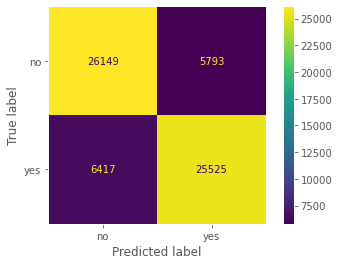

In [142]:
ConfusionMatrixDisplay.from_predictions(y_train_sm,train_pred)
plt.grid(False);

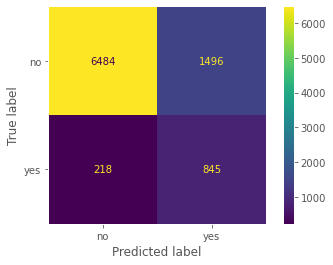

In [143]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred)
plt.grid(False);

In [144]:
from sklearn.metrics import RocCurveDisplay

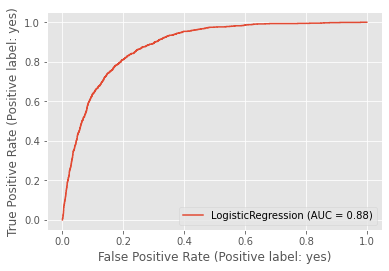

In [150]:
RocCurveDisplay.from_estimator(lg,x_test_scl,y_test);